In [13]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SEED = 42

### US Census

Predicting whether a person makes over $50,000 a year

#### Data exploartion

In [88]:
X_train = pd.read_csv("./Census Data/X_train.csv")
Y_train = pd.read_csv("./Census Data/y_train.csv")
X_test = pd.read_csv("./Census Data/X_test.csv")

print(X_train.info())
print(X_train.describe())

print(Y_train.value_counts())

print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       15344 non-null  object 
 4   education       16280 non-null  object 
 5   marital-status  16280 non-null  object 
 6   occupation      15099 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  native-country  15980 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB
None
                age  education-num  hours-per-week
count  16280.000000    16040.00000    16280.000000
mean      38.600614       10.09414       40.392936
std       13.695138        2.55840       12.345950
min       17.000000        1.00000 

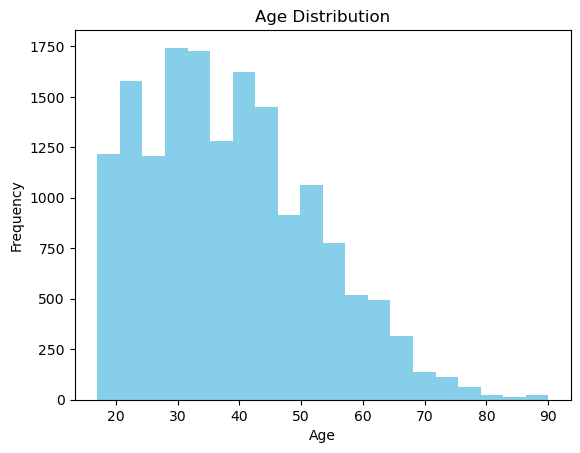

In [9]:
plt.hist(X_train['age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

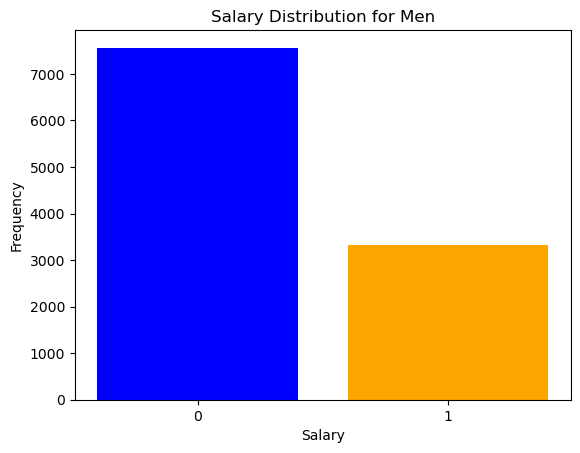

We have data for 10883 men.
7563 (69.49 %) of them earn more than $50,000


In [44]:
# inspecting prevalent biases (gender)

men_salary = Y_train.loc[X_train[X_train['sex'] == ' Male'].index]
women_salary = Y_train.loc[X_train[X_train['sex'] == ' Female'].index]

unique_men, counts_men = np.unique(men_salary, return_counts = True)
frequencies_men = dict(zip(unique_men, counts_men))

unique_women, counts_women = np.unique(women_salary, return_counts = True)
frequencies_women = dict(zip(unique_women, counts_women))

plt.bar(frequencies_men.keys(), frequencies_men.values(), color=['blue', 'orange'])

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution for Men')
plt.xticks([0, 1], ['0', '1'])
plt.show()

print("We have data for {} men.".format(len(men_salary)))
print("{} ({} %) of them earn more than $50,000".format(frequencies_men[1], round((frequencies_men[1]/len(men_salary)*100), 2)))

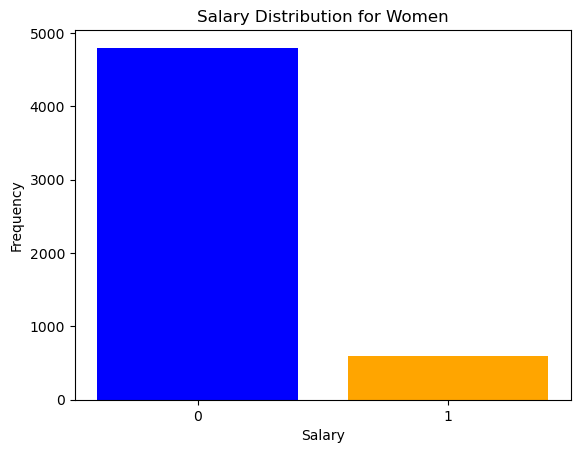

We have data for 5397 women.
600 (5.51 %) of them earn more than $50,000


In [45]:
plt.bar(frequencies_women.keys(), frequencies_women.values(), color=['blue', 'orange'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution for Women')
plt.xticks([0, 1], ['0', '1'])
plt.show()

print("We have data for {} women.".format(len(women_salary)))
print("{} ({} %) of them earn more than $50,000".format(frequencies_women[1], round((frequencies_women[1]/len(men_salary)*100), 2)))

In [94]:
def plot_distribution_and_percentage(attribute, color, title):
    values, counts = np.unique(X_train[attribute].fillna("Unknown"), return_counts=True)  # Fill NaNs as "Unknown"
    percentages = []

    for value, count in zip(values, counts):
        salary_above_50 = np.count_nonzero(Y_train.loc[X_train[attribute].fillna("Unknown") == value])
        percentages.append(round((salary_above_50 / count) * 100, 2))

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for count of people in each attribute value
    ax1.bar(values, counts, color=color, label='Count', alpha=0.7)
    ax1.set_xlabel(attribute.capitalize())
    ax1.set_ylabel('Count of People')
    ax1.set_xticks(np.arange(len(values)))
    ax1.set_xticklabels(values, rotation=45, ha='right')

    # Line plot for percentage earning above $50K
    ax2 = ax1.twinx()
    ax2.plot(values, percentages, color='orange', marker='o', label='Percentage > 50K')
    ax2.set_ylabel('Percentage Earning > $50K (%)')

    plt.title(f'Distribution of {title} and Percentage Earning More Than $50,000')
    ax1.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

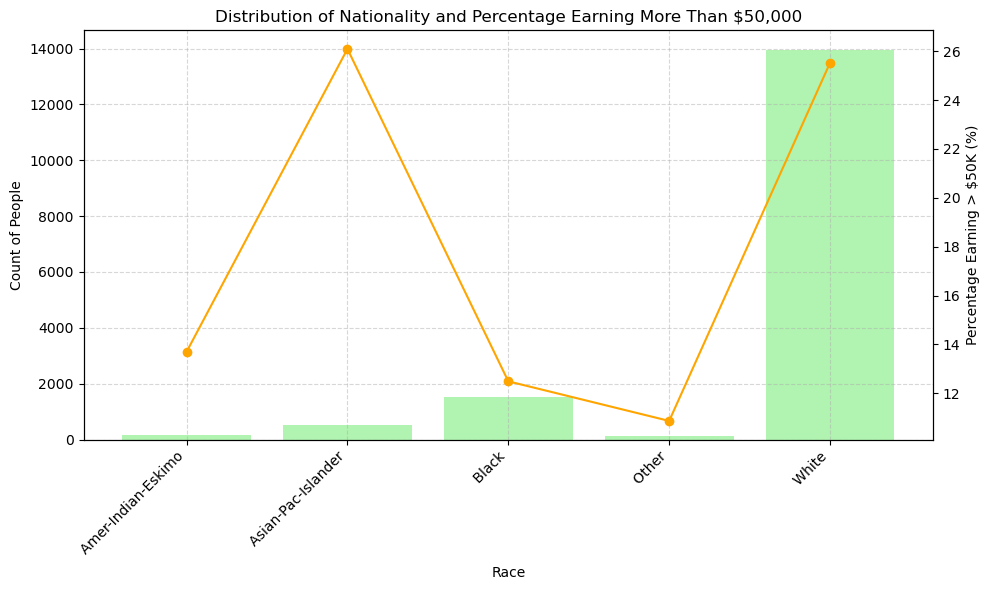

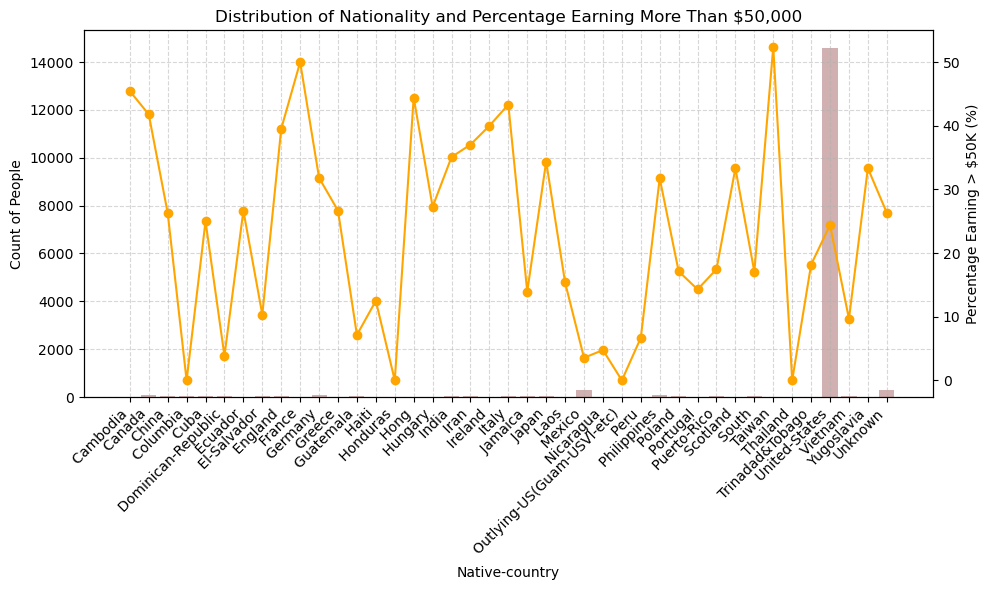

In [103]:
# inspecting prevalent biases (nationality, country of origin)

plot_distribution_and_percentage('race', 'lightgreen', 'Nationality')
plot_distribution_and_percentage('native-country', 'rosybrown', 'Nationality')

In [75]:
# inspecting prevalent biases (relationship status of men vs relationship status of women)

men_data = X_train[X_train['sex'] == ' Male']
women_data = X_train[X_train['sex'] == ' Female']

men_relationship_vs_salary = []
women_relationship_vs_salary = []

for status in np.unique(X_train['marital-status']):
    men = Y_train.loc[men_data[men_data['marital-status'] == status].index]
    salary_above_50_men = np.count_nonzero(men)
    men_relationship_vs_salary.append((status, round((salary_above_50_men / len(men)) * 100, 2)))
    
    women = Y_train.loc[women_data[women_data['marital-status'] == status].index]
    salary_above_50_women = np.count_nonzero(women)
    women_relationship_vs_salary.append((status, round((salary_above_50_women / len(women)) * 100, 2)))

print(men_relationship_vs_salary)
print(women_relationship_vs_salary)

[(' Divorced', 15.91), (' Married-AF-spouse', 33.33), (' Married-civ-spouse', 44.6), (' Married-spouse-absent', 11.11), (' Never-married', 5.82), (' Separated', 10.38), (' Widowed', 21.11)]
[(' Divorced', 6.2), (' Married-AF-spouse', 40.0), (' Married-civ-spouse', 46.04), (' Married-spouse-absent', 5.17), (' Never-married', 3.3), (' Separated', 4.03), (' Widowed', 6.59)]


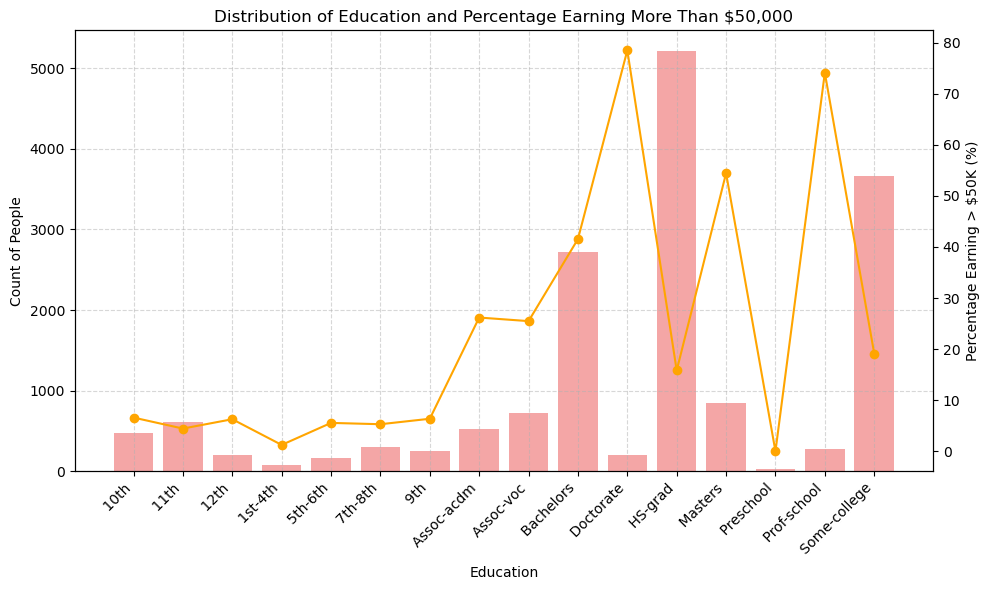

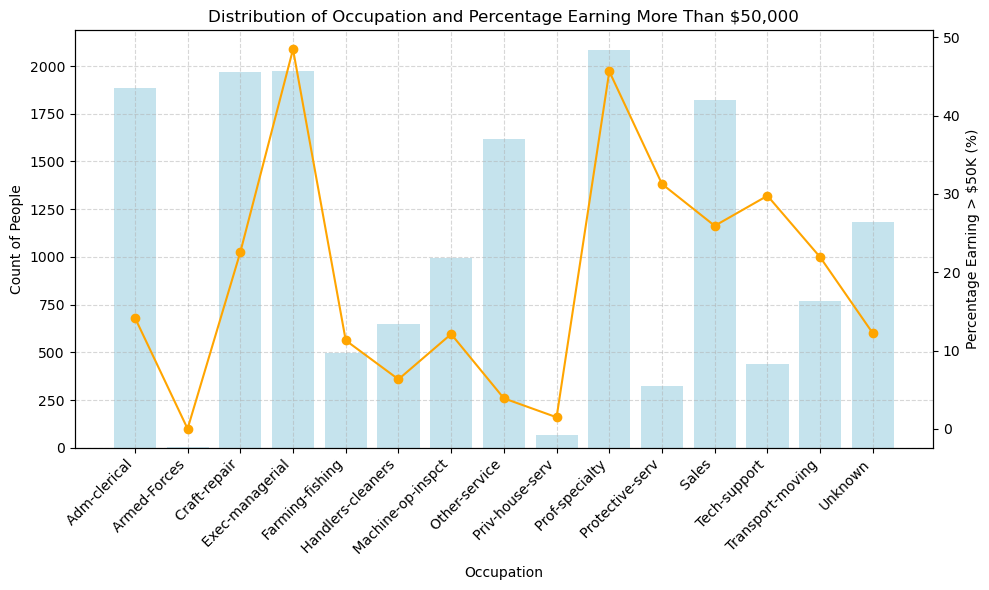

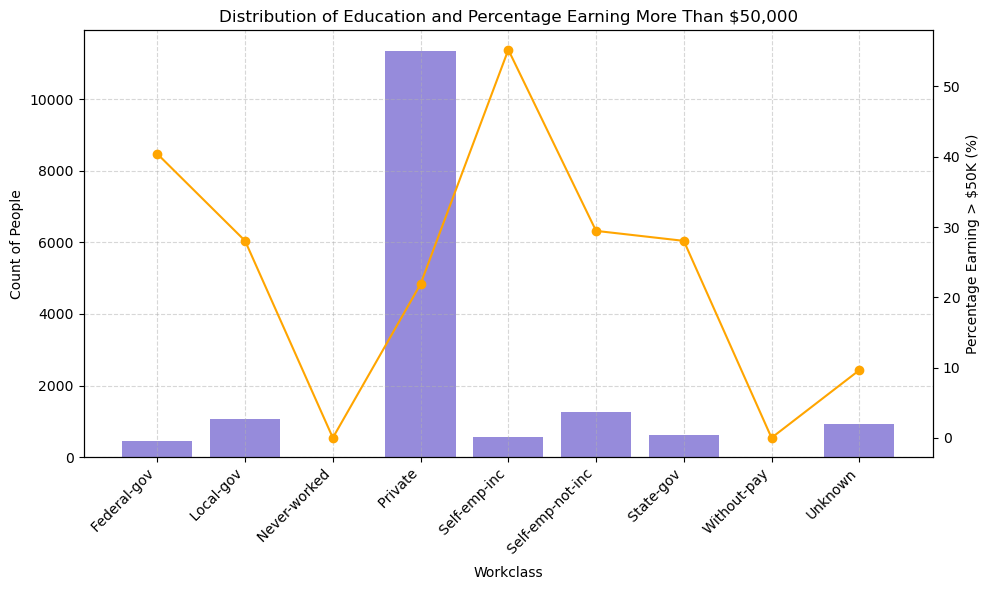

In [101]:
## inspecting other correlations

plot_distribution_and_percentage('education', 'lightcoral', 'Education')
plot_distribution_and_percentage('occupation', 'lightblue', 'Occupation')
plot_distribution_and_percentage('workclass', 'slateblue', 'Education')

#### 1. What is the right performance metric to use for this dataset?

Since the dataset is unbalanced (12360 people earning less than \\$50,000 and 3920 earning more) accuracy can be misleading as we can cheat our way to a higher score by assigning the more probable class. Precision and recall are good metrics when dealing with uneven data distribution. Based on their nature, precision would be useful when we want to make sure that we aren't producing a lot of false positives whereas recall focuses on having a low false negatives number. Since the task is to distinguish between people earning more than \\$50,000 vs less and the reason for doing so isn't stated, F1 score could be useful as it balances those two measures.

#### 2. Come up with the simplest baseline we should aim to beat. What is the minimum performance that we should expect of our learners?

The minimum accuracy classifier in the case of unevenly distributed data is the one that would always assign the class with the highest prior probability. In this case, this is the class of people earning less than \\$50,000 and its prior is approx. 75.92 %. If we want to beat the simplest classifier we should stirve for a performance metric higher than 75.92 % 

#### 3.  Algorithmic bias can be a real problem in machine learning. Should we use the race and sex features in our algorithm? Clearly explain what you believe and provide us with your argumentation.

Given the lack of information on the classifier’s intended use, it's difficult to definitively recommend an approach. If it is predicting future salaries, we should ensure fairness and avoid propagating bias, but simply excluding sensitive features (race, sex) won’t prevent discrimination due to proxy attributes. Instead, we should use sensitive attributes alongside fairness criteria (e.g., independence, separation). However, if we want to model current salary trends without impacting future opportunities, using these features can improve performance while accurately reflecting real-world disparities.

#### Data preparation

In [97]:
# handling missing values in 'education-num' feature

edu_mapping = X_train.groupby('education')['education-num'].mean()

# Step 2: Fill missing values in education-num based on the average for each education level
X_train['education-num'] = X_train.apply(
    lambda row: edu_mapping[row['education']] if pd.isnull(row['education-num']) else row['education-num'],
    axis=1
)

In [105]:
# handling missing values in "workclass", "native-country" features

most_frequent_value_1 = X_train['workclass'].mode()[0]
X_train['workclass'].fillna(most_frequent_value_1, inplace=True)

most_frequent_value_2 = X_train['native-country'].mode()[0]
X_train['native-country'].fillna(most_frequent_value_2, inplace=True)

X_train['occupation'].fillna('Unknown', inplace=True)

print(X_train['workclass'].isnull().sum())  # Should print 0
print(X_train['native-country'].isnull().sum())  # Should print 0
print(X_train['occupation'].isnull().sum())  # Should print 0

0
0
0


#### 1. Somefeatures have missing values that should be handled. List all features with missing values and explain how you handledthem. Use no more than 100 words.

Features with missing values: 
- "education-num": represents the number of years of education a person has received and is related to the "education" feature, which specifies the highest level of education, to handle the missing values, I am mapping each education level to the average number of years a person from the dataset has spent on to get to that level of education
- "workclass", "native-country": since the number of missing values isn't large and there is one dominating class, I decided to assign unknown to that class, as there is high probability that this could be true
- "occupation": as the amount of missing values is quite large and there isn't one dominating group we could assign them to, I decided to treat them as a separate category called "Unknown"

#### 2. Implementations of the algorithms in Scikit-learn expect numerical features. Check if all features are in a numerical format. If not, transform these features into numerical ones. List all features you transformed, explain how you transformed them, and why you chosethese transformations. Use no more than 75 words.

 #### 3. Forwhichalgorithms is the scale of the features important? Explain why (not) for each of the five algorithms. Bring the features to the same scale if necessary and describe your approach. Use no more than 100 words.

 #### 4. Have you done any other data pre-processing steps? If you did, explain what you did and why you did it. We suggest you consider (1) applying PCA (where the number of components is a hyper-parameter) and (2) addressing the imbalanced nature of the data. Use no more than 100 words.

Experiments